## Relevant links: 
### https://deepnote.com/@deepnote/3D-network-visualisations-using-plotly-oYxeN6UXSye_3h_ulKV2Dw 
### https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9
### https://towardsdatascience.com/python-interactive-network-visualization-using-networkx-plotly-and-dash-e44749161ed7 

### https://github.com/jhwang1992/network-visualization/blob/master/app.py 

#### TODO: 
- check the correspondence of the colors and the nodes 
- check if it can/should be directed

## Exploratory Analysis of the dataset

In [350]:
import pandas as pd 
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from addEdge import addEdge

In [245]:
edges = pd.read_excel (r'raan_case_study interns.xlsx', sheet_name='edges')
nodes=pd.read_excel (r'raan_case_study interns.xlsx', sheet_name='nodes')
nodes=nodes.drop(columns="Unnamed: 3")

In [246]:
edges.head()

,source_id,target_id,weights
0,966,945,13
1,966,879,10
2,649,966,9
3,941,966,8
4,966,467,8


### Observe that we have 2 excel sheets, one containing the edge information 
### (an edge defined between source_id and target_id) and weights
### The node sheet contains the node ids, the node colours and the node labels

In [14]:
nodes.node_id.values

array([   3,  158,  172,  185,  349,  457,  467,  498,  517,  552,  574,
        619,  639,  649,  652,  709,  747,  785,  792,  813,  879,  941,
        945,  966, 1009, 1025, 1042, 1152, 1157], dtype=int64)

In [18]:
edges.target_id.values

array([ 945,  879,  966,  966,  467, 1042,  785,  619,  966,  966,  966,
        966,  966,  639,  966, 1152,  517,  158,  966,  498,  966, 1157,
        185, 1025,  966,  966,  652,  172,  966,    3,  966,  966],
      dtype=int64)

### We have 29 different node_ids, node labels and 6 different color types. 

In [325]:
node_ids=list(set(nodes.node_id.values)) # the unique node_ids that are going to be used for creating the graph
print("the number of unique nodes are:" + str(len(node_ids)))

the number of unique nodes are:29


In [330]:
#convert the edge nodes into tuples of the form (source_id, target_id)
edge_list=list(edges[['source_id','target_id']].to_records(index=False)) #list of tuples to compare 
type(edge_list[0])

numpy.int64

In [331]:
def compare_edges(t1, t2): 
    '''
    input: 2 tuples that are going to be compared
    output: True if they contain the same elements
    e.g. compare_edges((1,2), (2,1)) gives True
    
    '''
    return sorted(t1) == sorted(t2)

In [333]:
comparison_list= []

True

### Observe that there are some edges (e.g. (879,966) with weight 5 and (966,879) with weight 10). 
#### Therefore, we observe that the direction of the edge makes difference -> use directed graph for the visualization

In [248]:
Gr_dir=nx.from_pandas_edgelist(edges, 'source_id', 'target_id', edge_attr=True, create_using=nx.DiGraph()) #directed graph 

In [67]:
Gr=nx.from_pandas_edgelist(edges, 'source_id', 'target_id', edge_attr=True) #undirected graph, the connections are symmetric 
# less edges than we expect to see otherwise 

In [71]:
Gr.edges

EdgeView([(966, 945), (966, 879), (966, 649), (966, 941), (966, 467), (966, 1042), (966, 785), (966, 619), (966, 457), (966, 639), (966, 747), (966, 185), (966, 349), (966, 1157), (966, 1152), (966, 517), (966, 158), (966, 552), (966, 498), (966, 574), (966, 1025), (966, 813), (966, 792), (966, 172), (966, 1009), (966, 3), (966, 709), (792, 652)])

In [334]:
Gr_dir.edges

OutEdgeView([(966, 945), (966, 879), (966, 467), (966, 1042), (966, 785), (966, 619), (966, 639), (966, 1152), (966, 517), (966, 158), (966, 498), (966, 1157), (966, 185), (966, 1025), (966, 172), (966, 3), (879, 966), (649, 966), (941, 966), (457, 966), (639, 966), (747, 966), (185, 966), (349, 966), (1157, 966), (552, 966), (574, 966), (813, 966), (792, 966), (792, 652), (1009, 966), (709, 966)])

In [337]:
##find the two-way relations between the nodes 
double_edges=[]
for edge in Gr_dir.edges: 
    if Gr_dir.has_edge(edge[1], edge[0]):
        double_edges.append(edge)


In [603]:
double_edges

[(966, 879),
 (966, 639),
 (966, 1157),
 (966, 185),
 (879, 966),
 (639, 966),
 (185, 966),
 (1157, 966)]

#### We observe that not all relations between the nodes are two-way, the network is not symmetric and therefore the direction will play an important role, since it gives information that we don't want to lose. 

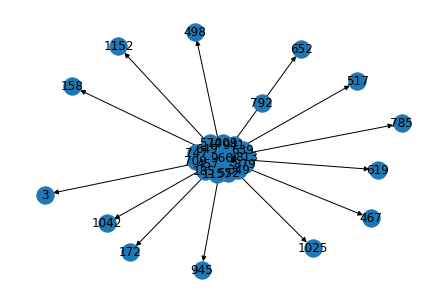

In [102]:
import matplotlib.pyplot as plt 
nx.draw(Gr_dir, with_labels=True )
plt.show()


In [249]:
atribs=nodes.set_index('node_id').to_dict('index') 
nx.set_node_attributes(Gr_dir, atribs)
#create a dictionary of dictionaries so that we are able to give it as node attributes
# https://stackoverflow.com/questions/54497929/networkx-setting-node-attributes-from-dataframe/54662176
#the keys are the node_ids and the values are a dictionary with keys node_color and node_label 
#access them by e.g. Gr_dir.nodes[3]['node_color']

## Start with 2-d visualization first

In [560]:
#get the positions of the nodes in the graph (different possible layouts, see:
#https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)
#pos = nx.kamada_kawai_layout(Gr_dir, weight='weights') #dictionary with node names and positions
#pos = nx.random_layout(Gr_dir, seed=2021)
#pos=nx.spring_layout(Gr_dir, weight='weights', seed=2021)
pos=nx.circular_layout(Gr_dir, scale=2) #dictionary key: node, value: array with coordinates 
#pos=nx.shell_layout(Gr_dir)

In [569]:
pos

{966: array([2.00000000e+00, 1.49011612e-08]),
 945: array([1.95324111, 0.42994089]),
 879: array([1.81515086, 0.8397782 ]),
 649: array([1.59218621, 1.21034838]),
 941: array([1.29477262, 1.52432407]),
 467: array([0.93681681, 1.76702418]),
 1042: array([0.53505677, 1.92709996]),
 785: array([0.10827792, 1.99706687]),
 619: array([-0.3235639 ,  1.97365309]),
 457: array([-0.74027628,  1.85795344]),
 639: array([-1.1223743 ,  1.65537788]),
 747: array([-1.45199096,  1.37539889]),
 185: array([-1.71371424,  1.03110792]),
 349: array([-1.89530635,  0.63860305]),
 1157: array([-1.98827589,  0.21623825]),
 1152: array([-1.98827589, -0.21623808]),
 517: array([-1.89530635, -0.6386029 ]),
 158: array([-1.71371424, -1.03110777]),
 552: array([-1.45199108, -1.37539886]),
 498: array([-1.12237442, -1.65537785]),
 574: array([-0.74027592, -1.85795353]),
 1025: array([-0.32356382, -1.97365306]),
 813: array([ 0.10827779, -1.99706684]),
 792: array([ 0.53505641, -1.92710005]),
 652: array([ 0.9368

In [570]:
pos[966]=np.array([0,0])

In [571]:
pos

{966: array([0, 0]),
 945: array([1.95324111, 0.42994089]),
 879: array([1.81515086, 0.8397782 ]),
 649: array([1.59218621, 1.21034838]),
 941: array([1.29477262, 1.52432407]),
 467: array([0.93681681, 1.76702418]),
 1042: array([0.53505677, 1.92709996]),
 785: array([0.10827792, 1.99706687]),
 619: array([-0.3235639 ,  1.97365309]),
 457: array([-0.74027628,  1.85795344]),
 639: array([-1.1223743 ,  1.65537788]),
 747: array([-1.45199096,  1.37539889]),
 185: array([-1.71371424,  1.03110792]),
 349: array([-1.89530635,  0.63860305]),
 1157: array([-1.98827589,  0.21623825]),
 1152: array([-1.98827589, -0.21623808]),
 517: array([-1.89530635, -0.6386029 ]),
 158: array([-1.71371424, -1.03110777]),
 552: array([-1.45199108, -1.37539886]),
 498: array([-1.12237442, -1.65537785]),
 574: array([-0.74027592, -1.85795353]),
 1025: array([-0.32356382, -1.97365306]),
 813: array([ 0.10827779, -1.99706684]),
 792: array([ 0.53505641, -1.92710005]),
 652: array([ 0.93681645, -1.76702426]),
 172:

In [572]:
for node in Gr_dir.nodes:
        Gr_dir.nodes[node]['pos'] = list(pos[node]) #has the 2-d positions of the nodes, it is like a node attribute

In [573]:
nx.get_node_attributes(Gr_dir, 'pos')

{966: [0, 0],
 945: [1.9532411098300027, 0.4299408944117898],
 879: [1.8151508569005046, 0.8397782001155376],
 649: [1.5921862123825117, 1.210348383058639],
 941: [1.2947726246977056, 1.5243240749749865],
 467: [0.9368168111518604, 1.7670241750135853],
 1042: [0.5350567692833176, 1.9270999588048279],
 785: [0.10827791617924203, 1.9970668711013835],
 619: [-0.3235639044656183, 1.973653093740981],
 457: [-0.7402762781213107, 1.8579534448392767],
 639: [-1.122374297391639, 1.6553778803767487],
 747: [-1.451990963358814, 1.3753988897140423],
 185: [-1.7137142434126784, 1.0311079178253797],
 349: [-1.8953063503018122, 0.6386030467825472],
 1157: [-1.9882758871189514, 0.21623824545133663],
 1152: [-1.9882758871189514, -0.21623808153856344],
 517: [-1.8953063503018122, -0.6386028977709352],
 158: [-1.7137142434126784, -1.0311077688137678],
 552: [-1.4519910825681035, -1.3753988599117197],
 498: [-1.1223744166009286, -1.6553778505744263],
 574: [-0.7402759204934418, -1.8579535342462439],
 1025

In [142]:
#for edge in Gr_dir.edges():
    #print(Gr_dir[edge[0]][edge[1]]['weights'])

In [517]:
#Create an edge between node x and node y with specific weight 
# [starting, ending, Gr_dir[starting][ending]['weights']]
def make_edge(x, y, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       mode      = 'lines',
                       hover= Gr_dir[x][y]['weights'] )

In [385]:
def make_edge(edge, pos):
    '''
    edge: a tuple that contains the beginning and the ending of the edge of the graph 
    pos: a dictionary with key the node_id and value the array of 2-d positions of the node
    '''
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight= Gr_dir[edge[0]][edge[1]]['weights']
    #edge_x, edge_y = addEdge(start, end, edge_x, edge_y, .8, 'end', .04, 30, nodeSize)
    return  go.Scatter(x         = [x0, x1, None],
                       y         = [y0, y1, None],
                       line      = dict(width = 0.3*weight**1.75,
                                   color = 'black'),
                       #opacity=weight,
                       mode      = 'lines',
                       text=str(weight),
                       hoverinfo='text')
                       #hover= str(weight) )

In [477]:
np.max(list(nx.get_edge_attributes(Gr_dir,'weights').values()))

13

In [613]:
edge_trace=[]
for edge in Gr_dir.edges:
    x0, y0 = Gr_dir.nodes[edge[0]]['pos']
    x1, y1 = Gr_dir.nodes[edge[1]]['pos']
    weight = Gr_dir[edge[0]][edge[1]]['weights']
    opacity= weight/np.max(list(nx.get_edge_attributes(Gr_dir,'weights').values())) #normalize between 0 and 1
    if edge in double_edges: 
        color='red'
    else: 
        color='cornflowerblue'
    trace = go.Scatter(x=tuple([x0, x1, None]), y=tuple([y0, y1, None]),
                        mode='lines',
                        line={'width': 10*weight/np.max(list(nx.get_edge_attributes(Gr_dir,'weights').values())), 'color': color},
                        line_shape='spline',
                        text=weight,
                        hoverinfo='text',
                        opacity=opacity)
    edge_trace.append(trace)

In [614]:
edge_trace

[Scatter({
     'hoverinfo': 'text',
     'line': {'color': 'cornflowerblue', 'shape': 'spline', 'width': 10.0},
     'mode': 'lines',
     'opacity': 1.0,
     'text': '13',
     'x': [0, 1.9532411098300027, None],
     'y': [0, 0.4299408944117898, None]
 }),
 Scatter({
     'hoverinfo': 'text',
     'line': {'color': 'red', 'shape': 'spline', 'width': 7.6923076923076925},
     'mode': 'lines',
     'opacity': 0.7692307692307693,
     'text': '10',
     'x': [0, 1.8151508569005046, None],
     'y': [0, 0.8397782001155376, None]
 }),
 Scatter({
     'hoverinfo': 'text',
     'line': {'color': 'cornflowerblue', 'shape': 'spline', 'width': 6.153846153846154},
     'mode': 'lines',
     'opacity': 0.6153846153846154,
     'text': '8',
     'x': [0, 0.9368168111518604, None],
     'y': [0, 1.7670241750135853, None]
 }),
 Scatter({
     'hoverinfo': 'text',
     'line': {'color': 'cornflowerblue', 'shape': 'spline', 'width': 5.384615384615385},
     'mode': 'lines',
     'opacity': 0.538461

In [424]:
#for each edge create a trace and append it to the list
edge_trace = []
for edge in Gr_dir.edges():
    trace  = make_edge(edge, pos)
    edge_trace.append(trace)

TypeError: make_edge() missing 1 required positional argument: 'width'

In [482]:
first_node=list(Gr_dir.edges())[0][0] #first node of an edge
second_node=list(Gr_dir.edges())[0][1] #second node of an edge

In [110]:
Gr_dir[966][945]['weights'] #this is how we access the weights as the edge attributes, here is the edge between node 966 and 945

{'weights': 13}

In [483]:
Gr_dir.nodes[3]['node_color']

'#0066CC'

In [575]:
x_node = [pos[i][0] for i in list(nx.get_node_attributes(Gr_dir,'pos').keys())]# x-coordinates of nodes
y_node = [pos[i][1] for i in list(nx.get_node_attributes(Gr_dir,'pos').keys())]# y-coordinates of nodes
#in that way we are sure that the colors and the labels are in the same line with the positions
#we use the same attribute dictionary (the keys are in the same ordering)

In [576]:
labels=list(nx.get_node_attributes(Gr_dir,'node_label').values()) #the labels of the nodes 
colors=list(nx.get_node_attributes(Gr_dir,'node_color').values()) #the colors of the nodes

In [580]:
###Create trace for the nodes: 
trace_nodes = go.Scatter(x=x_node,
                         y=y_node,
                        mode='markers',
                        marker=dict(symbol='circle',
                                    size=40,
                                    color=colors),#color the nodes according to their community
                                    text=labels,
                                    hoverinfo='text')

In [545]:
trace_nodes

Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [#ED8B00, #ED8B00, #ED8B00, #00965E, #ED8B00, #A05EB5,
                         #B1B3B3, #E40046, #00965E, #A05EB5, #00965E, #E40046,
                         #0066CC, #0066CC, #B1B3B3, #B1B3B3, #A05EB5, #0066CC,
                         #A05EB5, #A05EB5, #00965E, #B1B3B3, #E40046, #E40046,
                         #00965E, #0066CC, #ED8B00, #0066CC, #E40046],
               'size': 20,
               'symbol': 'circle'},
    'mode': 'markers',
    'text': [Anthony, Matthew, Christopher, Linda, Daniel, Richard, Margaret,
             Jessica, Patricia, David, Jennifer, Susan, Michael, William, Sandra,
             Betty, Thomas, John, Charles, Joseph, Mary, Lisa, Karen, Sarah,
             Elizabeth, Robert, Nancy, James, Barbara],
    'x': [0.07997508893846393, 0.11756108531288914, 0.14118051950956217,
          0.13970123388488168, 0.10717785661288669, 0.044315358195966374,
          -0.041223729789939025, -0.1357533020219005

In [535]:
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
)

# Create figure
fig = go.Figure(layout = layout)


In [608]:
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            title='')
#also need to create the layout for our plot
layout = go.Layout(title="The network 2-d visualization",
                width=1000,
                height=950,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis)),
                margin=dict(t=100),
                hovermode='closest',
                annotations=[
                            dict(   ax=(Gr_dir.nodes[edge[0]]['pos'][0] + Gr_dir.nodes[edge[1]]['pos'][0]) / 2,
                                    ay=(Gr_dir.nodes[edge[0]]['pos'][1] + Gr_dir.nodes[edge[1]]['pos'][1]) / 2, axref='x', ayref='y',
                                    x=(Gr_dir.nodes[edge[1]]['pos'][0] * 3 + Gr_dir.nodes[edge[0]]['pos'][0]) / 4,
                                    y=(Gr_dir.nodes[edge[1]]['pos'][1] * 3 + Gr_dir.nodes[edge[0]]['pos'][1]) / 4, xref='x', yref='y',
                                    showarrow=True,
                                    arrowhead=3,
                                    arrowsize=5,
                                    arrowwidth=1,
                                    arrowcolor='cornflowerblue',
                                    opacity=0.7
                                ) for edge in Gr_dir.edges])

In [615]:
layout=go.Layout(title='Network 2-d visualization', showlegend=False, hovermode='closest',
                            margin={'b': 40, 'l': 40, 'r': 40, 't': 40},
                            xaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
                            yaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
                            height=600,
                            clickmode='event+select',
                            annotations=[
                                dict(
                                    ax=(Gr_dir.nodes[edge[0]]['pos'][0] + Gr_dir.nodes[edge[1]]['pos'][0]) / 2,
                                    ay=(Gr_dir.nodes[edge[0]]['pos'][1] + Gr_dir.nodes[edge[1]]['pos'][1]) / 2, axref='x', ayref='y',
                                    x=(Gr_dir.nodes[edge[1]]['pos'][0] * 3 + Gr_dir.nodes[edge[0]]['pos'][0]) / 4,
                                    y=(Gr_dir.nodes[edge[1]]['pos'][1] * 3 + Gr_dir.nodes[edge[0]]['pos'][1]) / 4, xref='x', yref='y',
                                    showarrow=True,
                                    arrowhead=3,
                                    arrowsize=5,
                                    arrowwidth=1,
                                    arrowcolor='cornflowerblue',
                                    opacity=0.7
                                ) for edge in Gr_dir.edges]
                            )

In [616]:
#data = [edge_trace, trace_nodes]
fig = go.Figure(layout=layout)

for trace in edge_trace:
    fig.add_trace(trace)

fig.add_trace(trace_nodes)

fig.show()
fig.write_html('2d_visualization.html')

### Now try for the 3-d visualization

In [298]:
pos3d = nx.spring_layout(Gr_dir,dim=3, seed=2021, weight='weights')

In [291]:
pos3d = nx.kamada_kawai_layout(Gr_dir,dim=3, weight= 'weights')

In [299]:
def make_edge3d(edge, pos):
    '''
    edge: a tuple that contains the beginning and the ending of the edge of the graph 
    pos: a dictionary with key the node_id and value the array of 3-d positions of the node
    '''
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    weight= Gr_dir[edge[0]][edge[1]]['weights']
    
    return  go.Scatter3d(x    = [x0, x1, None],
                         y    = [y0, y1, None],
                         z    = [z0, z1, None], 
                         line = dict(width = weight,
                                   color = 'cornflowerblue'),
                         mode      = 'lines',
                         text=str(weight),
                         hoverinfo='text')
                       #hover= str(weight) 

In [300]:
edge_trace3d = []
for edge in Gr_dir.edges():
    trace  = make_edge3d(edge, pos3d)
    edge_trace3d.append(trace)

In [301]:
x_node = [pos3d[i][0] for i in list(pos3d.keys())]# x-coordinates of nodes
y_node = [pos3d[i][1] for i in list(pos3d.keys())]# y-coordinates of nodes
z_node = [pos3d[i][2] for i in list(pos3d.keys())]# z-coordinates of nodes

In [302]:
trace_nodes3d = go.Scatter3d(x=x_node,
                         y=y_node,
                         z=z_node,
                        mode='markers',
                        marker=dict(symbol='circle',
                                    size=40,
                                    color=colors), #color the nodes according to their community
                                    #colorscale=['lightgreen','magenta'], #either green or mageneta
                                    #line=dict(color='cornflowerblue', width=0.5)),
                        text=labels,
                        hoverinfo='text')

In [303]:
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            title='')
#also need to create the layout for our plot
layout = go.Layout(title="The network 3-d visualization",
                width=1000,
                height=950,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis)),
                margin=dict(t=100),
                hovermode='closest')

In [304]:
fig = go.Figure(layout=layout)

for trace in edge_trace3d:
    fig.add_trace(trace)

fig.add_trace(trace_nodes3d)

fig.show()
fig.write_html('3d_visualization.html')